# 5.1 선형 SVM 분류
* 선형, 비선형 분류, 회귀, 이상치 탐색에 사용할 수 있는 다목적 모델
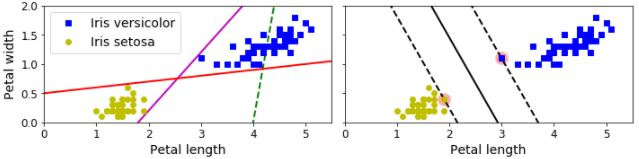

 * 왼쪽 그래프의 결정 경계는 임의의 직선을 그은 것
 * 오른쪽 그래프에 실선은 SVM 분류기의 결정 경계
  - 직선은 두 개의 클래스를 나누고 있고, 
  - 두 클래스를 나눌 때 최대한 큰 마진을 갖도록 경계를 정함 => **라지마진분류**
 * 도로 바깥쪽에 data를 추가하더라도 경계는 변하지 않으며, 오른쪽 그래프의 두 점선처럼 도로의 경계에 영향을 미치는 데이터를 **서프트 벡터(Support Vector)**라 함

 * 이렇게 경계를 정하여 데이터를 분류하는 모델을 **SVM(Supoort Vector Machine)**

**SVM은 특성 스케일에 민감하게 반응**

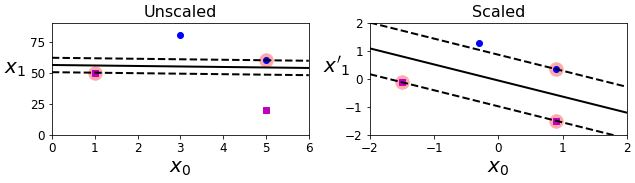

 - 왼쪽 그래프는 X1과 X0의 Scale이 달라 Margin이 거의 없는 경계가 생성
 - 오른쪽 그래프는 feature들의 스케일을 조정하여 경계가 훨씬 좋아졌음

# 5.1.1 소프트 마진 분류
 - Margin 분류는 Hard와 Soft 두 가지가 있음
 - Hard Margin 븐류는 모든 데이터가 도로의 바깥쪽에 올바르게 분류되어 있어야 함
    
    (문제점) 
     - 데이터가 선형적으로 구분될 수 있어야 함
     - 이상치에 민감함

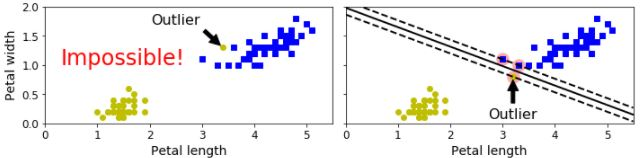
  

  - 왼쪽 그래프에서는 하드 마진을 찾을 수 없음
  - 오른쪽 그래프는 분류를 하더라도, 완벽하게 분류하기 위해 margin이 거의 없는 경계를 만들어야 함

**이런 문제를 해결하기 위해, 좀 더 유연한 모델이 필요**
 - 도로의 폭(Margin)을 가능한 한 넓게 유지하는 것
 - 마진 오류(Margin violation)를 적절히 조정하여 균형을 잡는 것을 소프트 마진 분류라 함

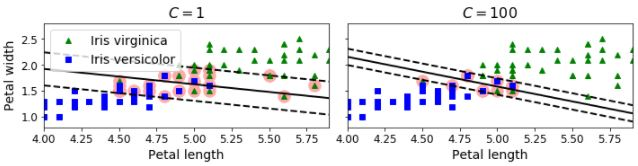


 - 왼쪽 그래프는 넓은 Margin (C=1)
 - 오른쪽 그래프는 마진오류 (C=100)

 - 사이킷런의 SVM 모델의 하이퍼 파라미터중 하나인 C는 이러한 트레이드 오프를 정하는 데 사용됨
 - C가 높을 수록 마진오류를 허용하지 않으려 함.
 - 마진 오류는 나쁘므로, 일반적으로 적은 것이 좋지만, 위의 경우에는 왼쪽 모델에 마진 오류가 많지만 일반화가 더 잘 될 것임

 
 **SVM 모델이 과대적합이라면 C를감소시켜 규제함**

In [42]:
# 붓꽃 데이터셋 적재 -> 특성 스케일을 변경 -> Iris-Viginia 품종을 감지하는 SVM 모델
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        #("linear_svc", LinearSVC(C=1, loss="hinge")),
        ("svc", SVC(kernel="linear", C=1 )),
        # ("sgdclassifier", SGDClassifier(loss="hinge")),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [43]:

svm_clf.predict([[5.5, 1.7]])

array([1.])

- SVM분류기는 로지스틱 회귀 분류기와는 다르게 클래스에 대한 확률을 제공하지 않음
- 일반적으로 확률적 경사 하강법을 적용(SGDClassifier)
- LinearSVC만큼 빠르게 수렴하진 않지만, 데이터셋이 아주 크거나, 온라인 학습으로 분류 문제를 다룰 때 유용